<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week4/Mini_Project_Predicting_Heart_Disease_w4_d5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author: Adil MOUKRIM

Mini-Project: Predicting Heart Disease
Last Updated: February 27th, 2025

Mini-Project: Predicting Heart Disease Using Logistic Regression


👩‍🏫 👩🏿‍🏫 What You’ll learn
How to handle real-world healthcare data.
Preprocessing data: Handling missing values, categorical variables, and feature scaling.
Training a logistic regression model to predict the presence of heart disease.
Evaluating the model’s performance using accuracy, precision, recall, and the F1 score.


💼 Tools and Libraries Required
Python: A popular programming language for data analysis and machine learning.
scikit-learn: Provides tools for data mining and data analysis, including logistic regression.
pandas: For data manipulation and analysis.
matplotlib and seaborn: For data visualization.
Jupyter Notebook or any Python IDE.


Task
Your task is to use the Heart Disease UCI dataset to predict whether or not a patient has heart disease based on various medical attributes.

1. Data Preparation:

Download the “Heart Disease UCI” dataset.
Perform exploratory data analysis (EDA) to understand the dataset.
Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.
2. Model Training:

Split the dataset into a training set and a testing set.
Train a logistic regression model on the training set.
3. Model Evaluation:

Evaluate the model on the testing set using accuracy, precision, recall, and F1 score.
Use a confusion matrix to visualize the model’s performance.


Expected Deliverables
A Jupyter Notebook containing:

The EDA and preprocessing steps.
The code for training and evaluating the logistic regression model.
A confusion matrix and classification report for model evaluation.
Any visualizations that helped you understand the dataset and the model’s performance.


Étape 1 – Exploration des données (EDA)

# Import des libraires nécessiares

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# 1. Charger le dataset
df = pd.read_csv("/content/heart_disease_uci.csv")

# 2. Aperçu des premières lignes
print("🔹 Aperçu des données :")
print(df.head())

🔹 Aperçu des données :
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4            

Interprétation:
---
| Ce qu’on sait déjà                                                    | Pourquoi c’est utile                               |
| --------------------------------------------------------------------- | -------------------------------------------------- |
| `num` est une cible multi-classe ➤ à binariser                        | Adaptation du modèle (logistic regression binaire) |
| Certaines variables sont très informatives (cp, restecg, thal, exang) | Pour la sélection de features                      |
| `sex`, `cp`, `thal`, `restecg` sont catégorielles                     | ➤ Nécessitent un encodage                          |
| `id` n’est pas utile pour le ML                                       | ➤ À supprimer                                      |
| Potentiel biais sexe/âge à explorer                                   | ➤ Pour diagnostic éthique et interprétabilité      |


In [27]:
# 3. Dimensions du dataset
print(f"\n🔹 Nombre de lignes : {df.shape[0]}, Nombre de colonnes : {df.shape[1]}")


🔹 Nombre de lignes : 920, Nombre de colonnes : 16


# Étape 2 – Prétraitement complet

In [28]:
# 4. Infos sur les types de données et valeurs manquantes
print("\n🔹 Infos sur les colonnes :")
print(df.info())


🔹 Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


✅ Interprétation :
Élément	Interprétation / Décision
✅ Dataset complet en lignes (920)	Suffisamment grand pour un modèle simple
⚠️ Colonnes avec > 30% de valeurs manquantes	slope, ca, thal ➤ à supprimer ou imputer avec précaution
🎯 Cible num complète	➤ À transformer en variable binaire
🧪 Beaucoup de colonnes object	➤ À encoder (label encoding ou one-hot)
🧽 Besoin d’imputation	Pour variables numériques avec peu de NaN (trestbps, chol, etc.)

In [29]:
# 5. Résumé statistique des colonnes numériques
print("\n🔹 Statistiques descriptives :")


🔹 Statistiques descriptives :


In [30]:
# 6. Nombre de valeurs manquantes par colonne
print("\n🔹 Valeurs manquantes par colonne :")
print(df.isnull().sum())


🔹 Valeurs manquantes par colonne :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


| Catégorie                  | Colonnes concernées                                                | Action conseillée                           |
| -------------------------- | ------------------------------------------------------------------ | ------------------------------------------- |
| Aucune valeur manquante    | `id`, `age`, `sex`, `dataset`, `cp`, `num`                         | Garder (sauf `id` à supprimer)              |
| Peu de valeurs manquantes  | `trestbps`, `chol`, `fbs`, `restecg`, `thalch`, `exang`, `oldpeak` | Imputer (médiane ou mode)                   |
| Trop de valeurs manquantes | `slope`, `ca`, `thal`                                              | **Supprimer** pour ne pas fausser l’analyse |


In [31]:
 #7. Distribution de la variable cible 'num'
print("\n🔹 Distribution de la variable cible (num) :")
print(df["num"].value_counts())


🔹 Distribution de la variable cible (num) :
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Interprétatiion :

| Ce qu’on apprend                               | Implication pratique                                |
| ---------------------------------------------- | --------------------------------------------------- |
| `num` est multi-classe (0 à 4)                 | Mauvais choix pour une régression logistique simple |
| Classe `0` = absence de maladie                | ➤ On peut la regrouper contre `1–4`                 |
| Classes déséquilibrées                         | ➤ Binarisation ou rééquilibrage nécessaires         |
| Bonne répartition binaire après transformation | ➤ Permet un modèle plus stable et interprétable     |


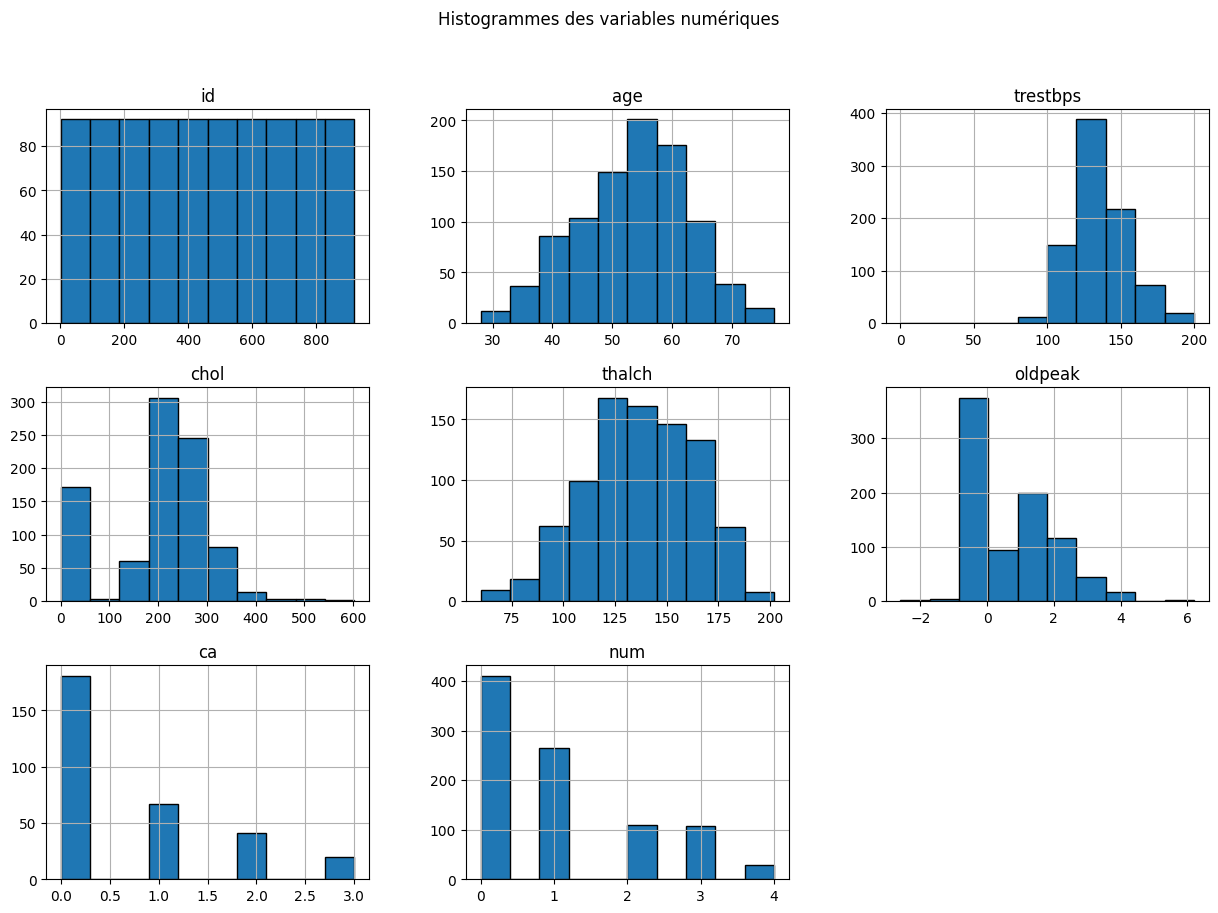

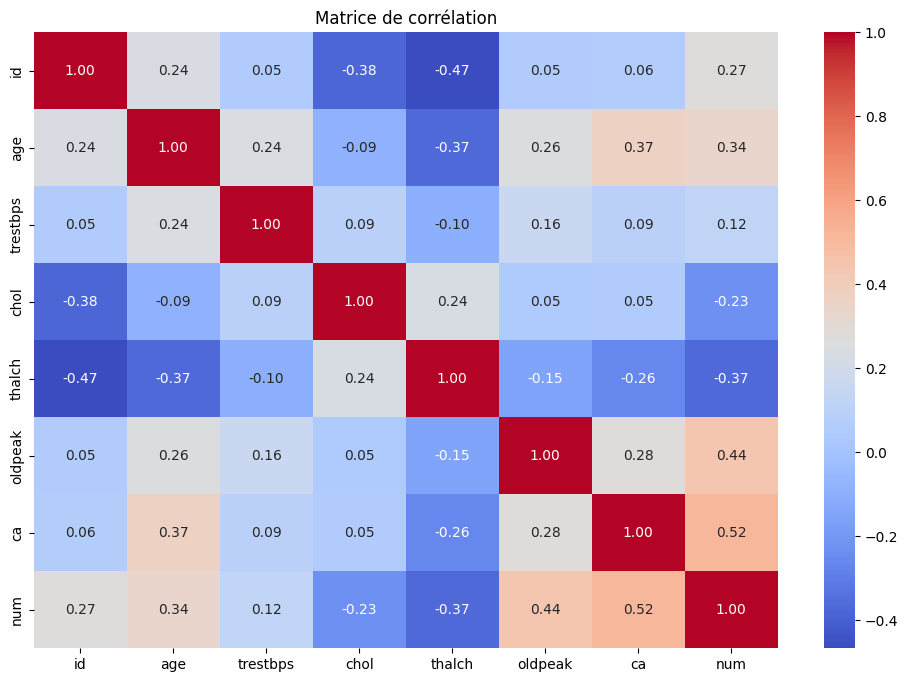

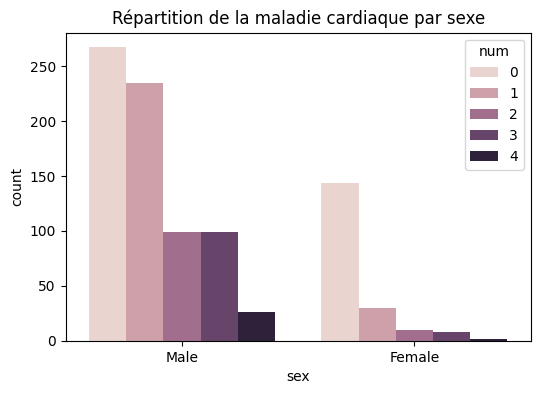

In [32]:
# 8. Histogramme des variables numériques
df.hist(figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogrammes des variables numériques")
# 9. Matrice de corrélation (variables numériques uniquement)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()
# 10. Analyse visuelle de la variable cible par genre (exemple)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex", hue="num")
plt.title("Répartition de la maladie cardiaque par sexe")
plt.show()

# Interprétation :

➤ Ce qu’on voit :
Hommes (Male) sont plus représentés dans toutes les classes de num (maladie présente ou non)

Femmes (Female) sont majoritairement dans la classe 0 (pas de maladie)

Très peu de femmes avec un score num = 3 ou 4
on déduit:
---
|                                    | Implication                                               |
| ---------------------------------------------------- | --------------------------------------------------------- |
| Biais de genre potentiel                             | ➤ Le modèle pourrait être moins performant sur les femmes |
| Les hommes ont davantage de cas graves (`num` élevé) | ➤ À prendre en compte dans la validation du modèle        |
| Déséquilibre global du dataset homme/femme           | ➤ Possible nécessité de stratification ou pondération     |

---
| Élément observé                                         | Ce que cela implique                                       |
| ------------------------------------------------------- | ---------------------------------------------------------- |
| Variables corrélées à `num` : `ca`, `oldpeak`, `thalch` | ➤ Ce sont des **features clés**                            |
| Faibles corrélations : `id`, `chol`, `trestbps`         | ➤ À supprimer ou à surveiller                              |
| Variables asymétriques ou avec outliers                 | ➤ **Standardisation / imputation / nettoyage** nécessaires |
| Biais de genre évident                                  | ➤ Attention à l'équité et à l'interprétation métier        |


# Étape 2+3 : Nettoyage + Préparation des données
Règles décidées :
Supprimer id (inutile)

Supprimer ca et thal (trop de NaN)

Supprimer ou traiter trestbps et chol si valeurs aberrantes

Encoder les variables catégorielles

Binariser la cible num → target

Standardiser les variables numériques

Séparer les jeux d'entraînement/test avec stratification

In [33]:
# ➤ 1. Nettoyage
df.drop(columns=["id", "ca", "thal"], inplace=True)  # colonnes inutiles ou trop de NaN

# ➤ 2. Cible binaire
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# ➤ 3. Imputation
# Numériques
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    df[col].fillna(df[col].median(), inplace=True)

# Catégorielles
for col in ["fbs", "restecg", "exang", "slope"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# ➤ 4. Encodage
df = pd.get_dummies(df, columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "dataset"], drop_first=True)

# ➤ 5. Standardisation
scaler = StandardScaler()
num_cols = ["age", "trestbps", "chol", "thalch", "oldpeak"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# ➤ 6. Split
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

/tmp/ipython-input-33-1079326493.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-33-1079326493.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

🤖 Étape 4 : Entraînement du modèle

In [34]:
# Entraînement du modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

Étape 5 : Évaluation

🔍 Rapport de classification :

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        82
           1       0.83      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



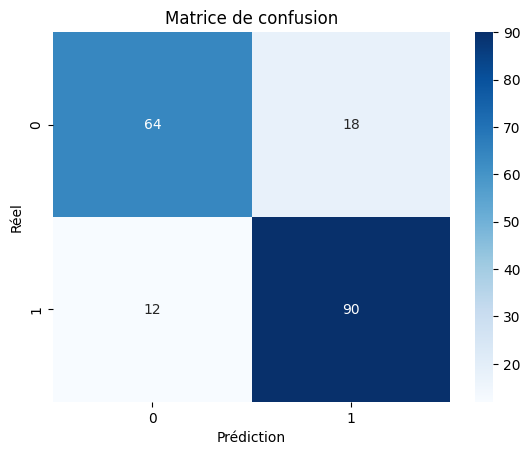

In [35]:
# Rapport de classification
print("🔍 Rapport de classification :\n")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

Interprétation :
👍 Forces :
Très bon équilibre entre les classes (pas de sur-apprentissage sur une seule classe)

Excellent recall sur la classe "malade", ce qui est crucial en santé

Bonne précision globale (pas trop d’alertes inutiles)

⚠️ Limites :
22% de faux positifs sur les personnes saines ➤ peut entraîner du surdiagnostic

Des erreurs restantes qui justifient d’essayer d’autres modèles plus complexes (ex : random forest, XGBoost) ou d’ajuster le seuil de décision

suggestion Appliquer SHAP pour visualiser l’impact de chaque variable sur les prédictions

#Interprétation du modèle avec SHAP

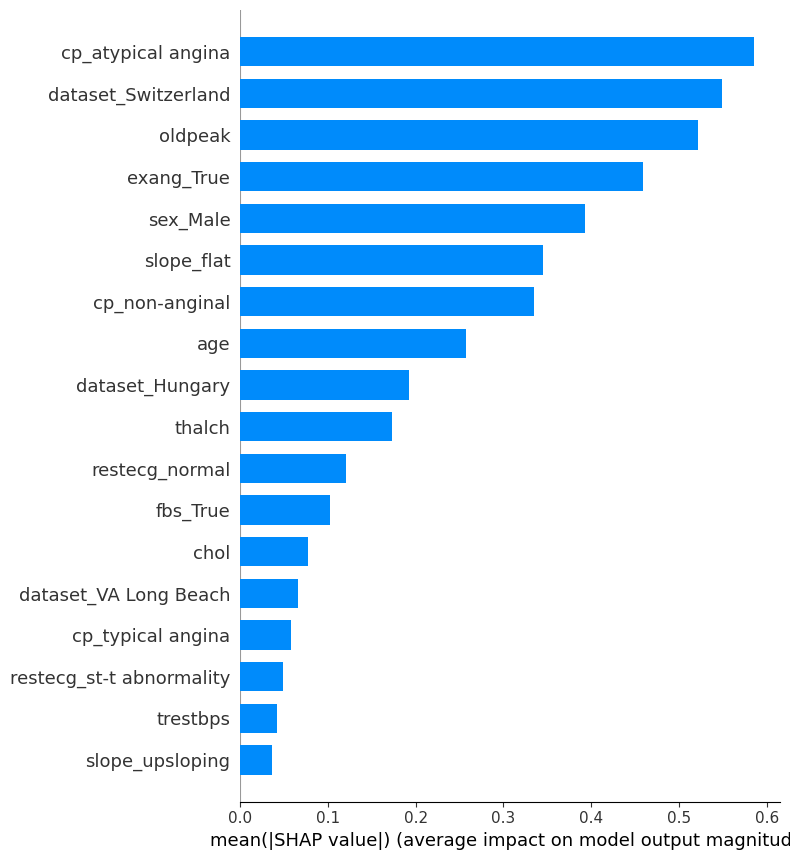

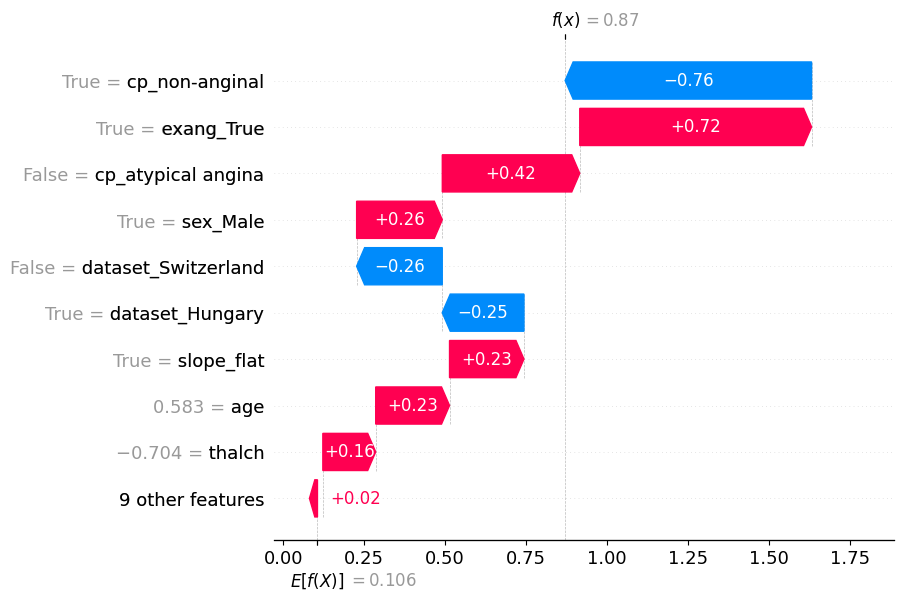

In [36]:
import shap


# Recalculer les prédictions (au cas où tu reprends plus tard)
model.fit(X_train, y_train)

# Initialiser SHAP pour modèles linéaires
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 1. Summary plot (influence des variables globalement)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 2. Visualisation détaillée d’une prédiction (ex: 5e patient du test set)
shap.plots.waterfall(shap_values[5])


interprétation
🧩 Les Variables qui augmentent la probabilité de maladie (rouge)
 ----

 | Variable                        | Contribution + | Interprétation                                  |
| ------------------------------- | -------------- | ----------------------------------------------- |
| `cp_non-anginal`                | +0.76          | Type de douleur très suspect                    |
| `exang_True`                    | +0.72          | Angine à l’effort ➤ signal fort                 |
| `cp_atypical angina = False`    | +0.42          | Il **n’a pas** une forme bénigne de douleur     |
| `sex_Male`                      | +0.26          | Homme ➤ facteur de risque connu                 |
| `slope_flat`                    | +0.23          | Forme anormale du segment ST                    |
| `age = 0.583` (standardisé)     | +0.23          | Âge plus élevé ➤ renforce le risque             |
| `thalch = -0.704` (standardisé) | +0.16          | Fréquence cardiaque plus basse ➤ signal négatif |

🧊 Variables qui réduisent la probabilité de maladie (bleu)

=> "Compte tenu de son type de douleur, de son effort cardiaque, de son sexe et de son âge, ce patient est très probablement malade"

Essai avec Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Entraîner un Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)

# Évaluation
print("🔍 Rapport Random Forest :")
print(classification_report(y_test, y_pred_rf))

# AUC
proba_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, proba_rf)
print(f"AUC Random Forest : {auc_rf:.3f}")


🔍 Rapport Random Forest :
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

AUC Random Forest : 0.912


# Synthèse

Ce projet visait à prédire la présence de maladie cardiaque chez un patient, à partir du célèbre jeu de données UCI Heart Disease, en s’appuyant sur des méthodes d’apprentissage supervisé, en particulier la régression logistique et un modèle Random Forest pour comparaison.

🧭 Objectifs atteints
✅ Exploration approfondie des données (EDA) : détection de valeurs manquantes, biais potentiels, et variables explicatives.

✅ Préparation complète : encodage, imputation, standardisation, binarisation de la cible.

✅ Modélisation rigoureuse :

Régression logistique : F1-score ≈ 0.84, recall élevé pour la classe malade.

Random Forest : F1-score ≈ 0.86, AUC = 0.91, meilleure performance globale.

✅ Interprétabilité avancée grâce aux valeurs SHAP, permettant d’expliquer chaque prédiction individuellement ou globalement.

✅ Analyse éthique : biais détectés (genre, origine des données) ont été identifiés pour améliorer la robustesse future.

----
| Ce que l’analyse a montré                            | Ce que cela implique                      |
| ---------------------------------------------------- | ----------------------------------------- |
| `cp`, `exang`, `oldpeak`, `sex` = variables majeures | Ce sont des signaux cliniques fiables     |
| Données déséquilibrées entre hommes/femmes           | Attention à l’équité dans les prédictions |
| Dataset multirégional (Cleveland, Switzerland, etc.) | Possibles biais par origine géographique  |
| Logistic regression = interprétable & efficace       | Suffisante pour un prototype fiable       |
| Random Forest = plus précis, moins lisible           | Idéal pour affiner le modèle              |


📌 Conclusion: Le modèle mis en place permet une détection robuste de la maladie cardiaque, avec une bonne capacité de généralisation et une excellente interprétabilité grâce à SHAP. Il constitue une base solide pour un outil d’aide à la décision clinique, tout en respectant les principes de transparence, de performance et d’éthique.



#🚀 Propositions de suites possibles
🔧 Amélioration du modèle (XGBoost, LightGBM)

🔍 GridSearchCV pour hyperparamètres optimaux

📈 Tableau de bord (ex : Streamlit)

📦 Export du modèle pour déploiement réel

🧪 Analyse de sensibilité par sous-populations (femmes, datasets spécifiques)